In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedDict as od
from decimal import Decimal
# from functions import generate_volumebars, read_trades, read_book
from book_features import get_features, wide_book, get_wb_cols, wide_book_csv, cum_bid_ask_imbalance, get_features
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [16]:
df = pd.read_csv('data/book-BINANCE_FUTURES-BTC-USDT-PERP.csv', header=None, index_col=False)
df.columns = ['timestamp', 'feed', 'symbol', 'ask', 'bid']

In [17]:
df.iloc[0]

timestamp                                  1672598043.66700006
feed                                           BINANCE_FUTURES
symbol                                           BTC-USDT-PERP
ask          {Decimal('16584.30'): Decimal('27.729'), Decim...
bid          {Decimal('16584.20'): Decimal('14.837'), Decim...
Name: 0, dtype: object

In [18]:
df.size

517810

In [19]:
df = df.head(100000)

In [20]:
df2 = wide_book_csv(df)
df2.head()

,asks[0].price,asks[0].size,asks[1].price,asks[1].size,asks[2].price,asks[2].size,asks[3].price,asks[3].size,asks[4].price,asks[4].size,...,bids[5].size,bids[6].price,bids[6].size,bids[7].price,bids[7].size,bids[8].price,bids[8].size,bids[9].price,bids[9].size,date
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 18:34:03.667000055,16584.30000000,27.72900000,16584.40000000,4.35700000,16584.50000000,1.51300000,16584.60000000,4.24700000,16584.70000000,0.06300000,...,1.10000000,16583.60000000,0.95200000,16583.50000000,7.13200000,16583.30000000,0.11200000,16583.20000000,8.14900000,1672598043667000055
2023-01-01 18:34:03.712000132,16584.30000000,27.72900000,16584.40000000,4.35700000,16584.50000000,1.51300000,16584.60000000,4.24600000,16584.70000000,0.06300000,...,1.10000000,16583.60000000,0.95200000,16583.50000000,7.13200000,16583.30000000,0.11200000,16583.20000000,8.14900000,1672598043712000132
2023-01-01 18:34:03.812000036,16584.30000000,28.34200000,16584.40000000,4.35700000,16584.50000000,1.51300000,16584.60000000,0.03000000,16584.70000000,0.06300000,...,1.10000000,16583.60000000,0.95200000,16583.50000000,7.13200000,16583.30000000,0.11200000,16583.20000000,8.14900000,1672598043812000036
2023-01-01 18:34:03.912000179,16584.30000000,28.46000000,16584.40000000,4.35700000,16584.50000000,1.51300000,16584.60000000,0.03000000,16584.70000000,0.06300000,...,1.10000000,16583.60000000,0.95200000,16583.50000000,7.12500000,16583.30000000,0.11200000,16583.20000000,8.14900000,1672598043912000179
2023-01-01 18:34:04.012000084,16584.30000000,28.46000000,16584.40000000,4.35700000,16584.50000000,1.51300000,16584.60000000,0.03000000,16584.70000000,0.06300000,...,1.10000000,16583.60000000,0.95200000,16583.50000000,7.12500000,16583.30000000,0.11200000,16583.20000000,8.14900000,1672598044012000084


In [34]:
f = get_features(df2, levels=10)
f.columns

Index(['asks[0].price', 'asks[0].size', 'asks[1].price', 'asks[1].size',
       'asks[2].price', 'asks[2].size', 'asks[3].price', 'asks[3].size',
       'asks[4].price', 'asks[4].size', 'asks[5].price', 'asks[5].size',
       'asks[6].price', 'asks[6].size', 'asks[7].price', 'asks[7].size',
       'asks[8].price', 'asks[8].size', 'asks[9].price', 'asks[9].size',
       'bids[0].price', 'bids[0].size', 'bids[1].price', 'bids[1].size',
       'bids[2].price', 'bids[2].size', 'bids[3].price', 'bids[3].size',
       'bids[4].price', 'bids[4].size', 'bids[5].price', 'bids[5].size',
       'bids[6].price', 'bids[6].size', 'bids[7].price', 'bids[7].size',
       'bids[8].price', 'bids[8].size', 'bids[9].price', 'bids[9].size',
       'date', 'bai0', 'bai1', 'bai2', 'bai3', 'bai4', 'bai5', 'bai6', 'bai7',
       'bai8', 'bai9', 'midprice'],
      dtype='object')

In [41]:
df2.index.min()

Timestamp('2023-01-01 18:34:03.667000055')

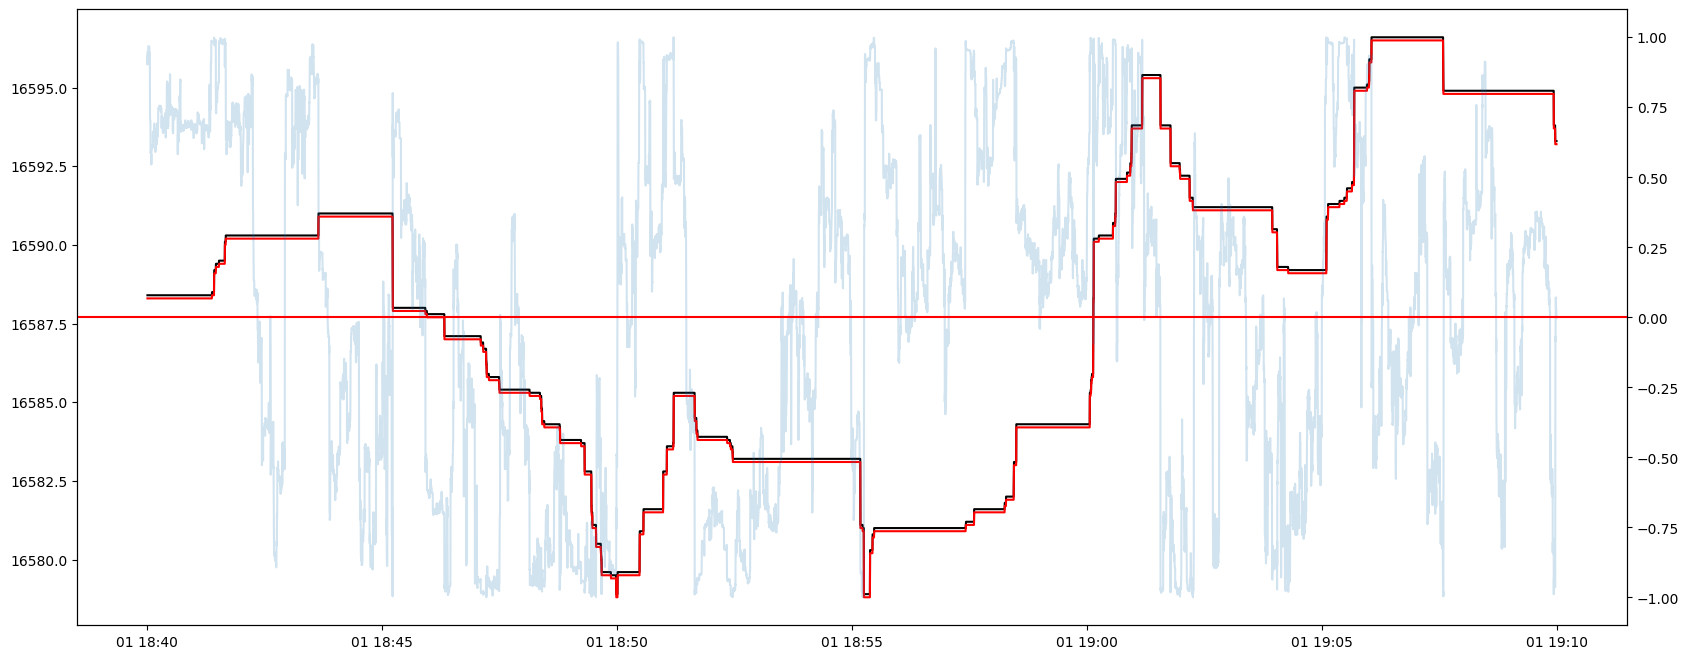

In [50]:
start = "2023-01-01 18:40:00"
end = "2023-01-01 19:10:00"

plot_df = f[(f.index > start) & (f.index < end)]

fig = plt.figure(figsize=(20, 8))
ax1 = plt.subplot()
l1, = ax1.plot(plot_df['asks[0].price'], color='black')
l2, = ax1.plot(plot_df['bids[0].price'], color='red')
ax2 = ax1.twinx()
ax2.plot(plot_df.bai2, alpha=0.2)
# ax2.plot(plot_df['bids[0].size'], alpha=0.2)

ax2.axhline(y = 0, color = 'r', linestyle = '-')

In [27]:
def wide_book_levels(df, bids=True):
    odict_list = []
    

    for ix, row in df.iterrows():
        odict = od({})
        odict.update({"timestamp": row["timestamp"]})
        if bids:
            for index, i in enumerate(sorted(eval(row["bid"]).items(), reverse=True)):
                odict.update({f"{i[0]}": f"{i[1]}"})
        else:
            for index, i in enumerate(eval(row["ask"]).items()):
                odict.update({f"{i[0]}": f"{i[1]}"})

        odict_list.append(odict.copy())

    df = pd.DataFrame(odict_list)
    df["date"] = pd.to_datetime(df["timestamp"], unit="s")
    df.set_index(df["date"], inplace=True)
    df.drop(["timestamp"], axis=1, inplace=True)
    df.drop(["date"], axis=1, inplace=True)
    df = df.apply(pd.to_numeric)
    return df